In [230]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import xgboost as xgb

In [231]:
dataframe = pd.read_csv('salida/resultados/TRAIN/TRAIN_1.csv.csv')

In [232]:
dataframe

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.889029,222.236020,1.530,15.544492,4.125026,0.168578,0,0,0.182136,neutral
1,1.288226,167.073230,1.855,20.750822,3.085398,0.216032,0,0,0.223190,contradiction
2,0.357849,52.340294,0.918,5.530905,1.042048,0.192453,0,0,0.161515,entailment
3,0.937865,143.613620,1.500,6.921344,1.084202,0.290386,0,0,0.325816,neutral
4,1.692443,119.414610,1.459,10.347388,1.642457,0.330360,0,0,0.410217,entailment
...,...,...,...,...,...,...,...,...,...,...
995,1.387691,227.012400,2.522,18.195731,7.039956,0.302567,0,0,0.283556,contradiction
996,0.011550,112.833740,1.000,3.789766,1.113420,0.075257,0,0,-0.016213,entailment
997,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,entailment
998,1.903655,141.925100,1.649,14.476012,21.083603,0.175958,0,0,0.407239,contradiction


<Axes: title={'center': 'distancias'}, xlabel='CLASS'>

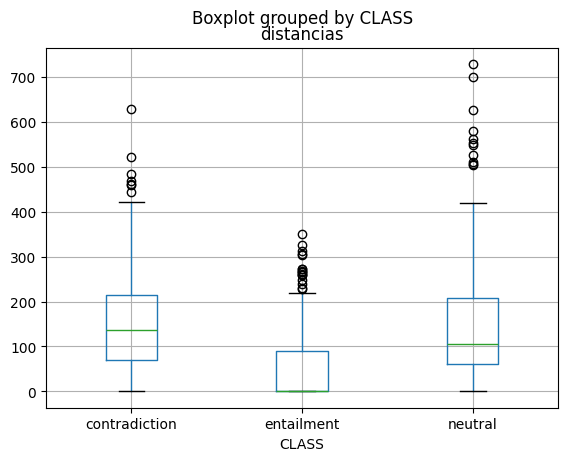

In [233]:
dataframe.boxplot(by="CLASS",column=["distancias"])

<Axes: title={'center': 'entropias'}, xlabel='CLASS'>

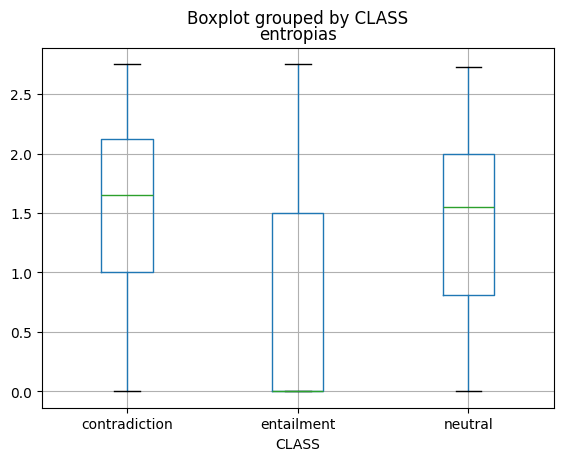

In [234]:
dataframe.boxplot(by="CLASS",column=["entropias"])

<Axes: title={'center': 'mutual_info'}, xlabel='CLASS'>

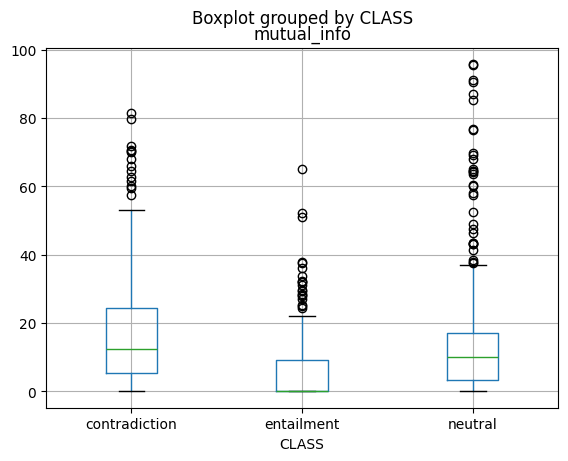

In [235]:
dataframe.boxplot(by="CLASS",column=["mutual_info"])

array([<Axes: title={'center': 'm_earth'}, xlabel='CLASS'>,
       <Axes: title={'center': 'suma'}, xlabel='CLASS'>], dtype=object)

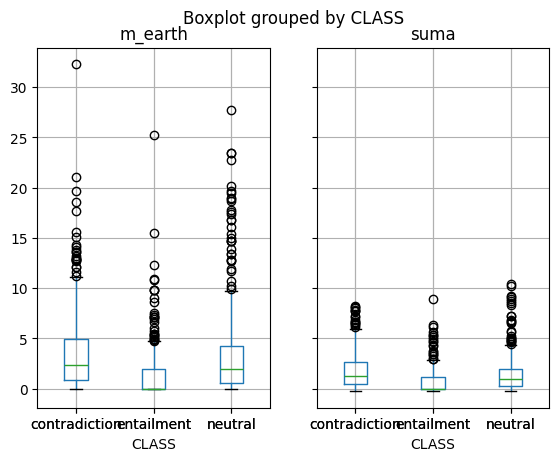

In [236]:
dataframe.boxplot(by="CLASS",column=["m_earth","suma"])

<Axes: title={'center': 'sim_faltantes'}, xlabel='CLASS'>

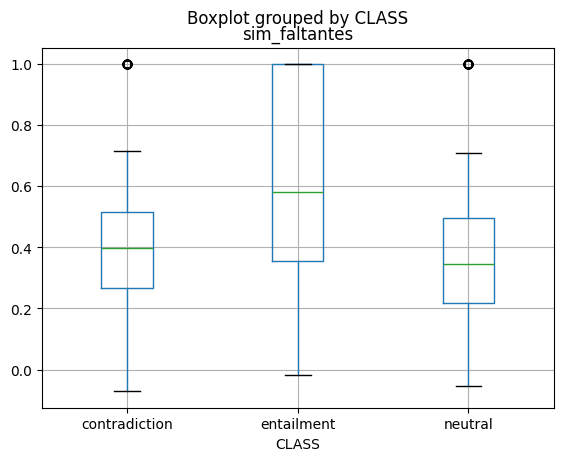

In [237]:
dataframe.boxplot(by="CLASS",column=["sim_faltantes"])

<Axes: title={'center': 'max_info_p'}, xlabel='CLASS'>

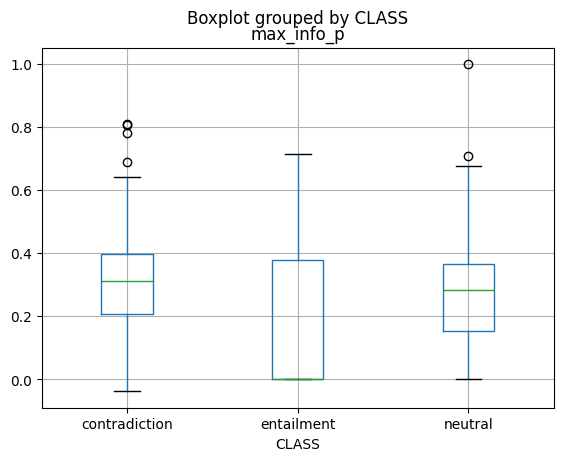

In [238]:
dataframe.boxplot(by="CLASS",column=["max_info_p"])

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

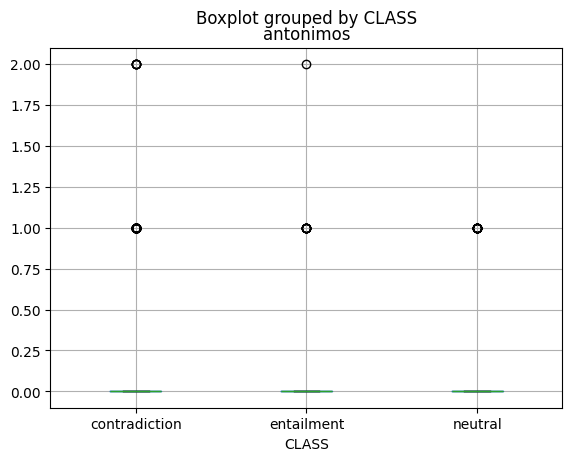

In [239]:
dataframe.boxplot(by="CLASS",column=["antonimos"])

<Axes: title={'center': 'relaciones'}, xlabel='CLASS'>

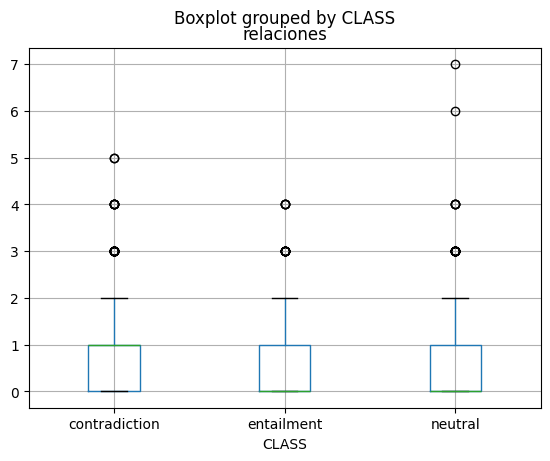

In [240]:
dataframe.boxplot(by="CLASS",column=["relaciones"])

In [241]:
#dataframe=dataframe.drop(['entropias'],axis=1)

In [242]:
X = np.array(dataframe.drop(['CLASS'],axis=1))
y_ = np.array(dataframe['CLASS'])

In [243]:
y=[]
for i in y_:
    if i == "contradiction":
        y.append(0)
    elif i == "entailment":
        y.append(1)
    else:
        y.append(2)

In [244]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=10)

In [246]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [247]:
# Define hyperparameters
#params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [248]:
clf_xgb = xgb.XGBClassifier(objective='reg:logistic',n_estimators=5000,device="cuda")
clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)

In [249]:
accuracy_score(y_test,preds_xgb)

0.52

In [250]:
clf_lr = LR().fit(X_train, y_train)

In [251]:
accuracy_xgb = float(np.sum(preds_xgb == np.array(y_test)))/len(np.array(y_test))
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = clf_lr.score(X_test, y_test)
print('Accuracy de Logistic Regression: ', accuracy_lr)

Accuracy de XGBoost:  0.52
Accuracy de Logistic Regression:  0.51


In [252]:
confusion_matrix(y_test, preds_xgb)

array([[25,  8, 19],
       [17, 49, 10],
       [22, 20, 30]])

In [253]:
data=xgb.DMatrix(X, label=y)

In [254]:
#Performing cross-validation
#cv_results = xgb.cv(data, num_boost_round=10, nfold=3,metrics='logloss', seed=42)

#Printing the results
#print(cv_results)